In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import numpy as np

In [2]:
file = joblib.load("/media/nadinespy/NewVolume1/work/current_projects/viiit/viiit_with_miguel/IntegratedInformationInVariationalInference/results/analyses/discrete_steady_state_df_100_11_001_1_0_001.pkl")

In [3]:
df = file

In [4]:
df.head()

,correlation,error_variance,time_lag,weight,phi,phiR,kldiv,double_red,rtr,rtx,...,str,stx,sty,sts,synergy_phiid,transfer_phiid,emergence_capacity_phiid,downward_causation_phiid,phi_phiid,phiR_phiid
0,0.0,0.01,1,0.0,-1.387779e-15,-1.387779e-15,5.025126e-07,0.0,0.0,0.0,...,1.958518,-1.958518,-1.958518,3.917036,0.0,0.0,1.958518,-1.958518,0.0,0.0
1,0.0,0.01,1,0.1,-1.387779e-15,-1.387779e-15,5.025126e-07,0.0,0.0,0.0,...,1.958518,-1.958518,-1.958518,3.917036,0.0,0.0,1.958518,-1.958518,0.0,0.0
2,0.0,0.01,1,0.2,-1.387779e-15,-1.387779e-15,5.025126e-07,0.0,0.0,0.0,...,1.958518,-1.958518,-1.958518,3.917036,0.0,0.0,1.958518,-1.958518,0.0,0.0
3,0.0,0.01,1,0.3,-1.387779e-15,-1.387779e-15,5.025126e-07,0.0,0.0,0.0,...,1.958518,-1.958518,-1.958518,3.917036,0.0,0.0,1.958518,-1.958518,0.0,0.0
4,0.0,0.01,1,0.4,-1.387779e-15,-1.387779e-15,5.025126e-07,0.0,0.0,0.0,...,1.958518,-1.958518,-1.958518,3.917036,0.0,0.0,1.958518,-1.958518,0.0,0.0


In [5]:
df.columns

Index(['correlation', 'error_variance', 'time_lag', 'weight', 'phi', 'phiR',
       'kldiv', 'double_red', 'rtr', 'rtx', 'rty', 'rts', 'xtr', 'xtx', 'xty',
       'xts', 'ytr', 'ytx', 'yty', 'yts', 'str', 'stx', 'sty', 'sts',
       'synergy_phiid', 'transfer_phiid', 'emergence_capacity_phiid',
       'downward_causation_phiid', 'phi_phiid', 'phiR_phiid'],
      dtype='object')

In [81]:
quantities = ['phi', 'phiR', 'double_red', 'rtr', 'sts',
              'synergy_phiid', 'transfer_phiid',
              'emergence_capacity_phiid', 'downward_causation_phiid',
              'phi_phiid', 'phiR_phiid']

titles = [r'$\varphi$', r'$\varphi^R$', r'$double-redundancy$', r'$\varPhi ID-based\; double-redundancy$', 
          r'$double-synergy$', r'$\varPhi ID-based\; synergy$', r'$\varPhi ID-based\; transfer\; entropy$', 
          r'$\varPhi ID-based\; whole-parts\; emergence$', r'$\varPhi ID-based\; downward\; causation$', 
          r'$\varPhi ID-based\; \varphi$', r'$\varPhi ID-based\; \varphi^R$']

/tmp/ipykernel_95409/3772867746.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis_r')


1
2
3
4
5
6
7
8
9
10


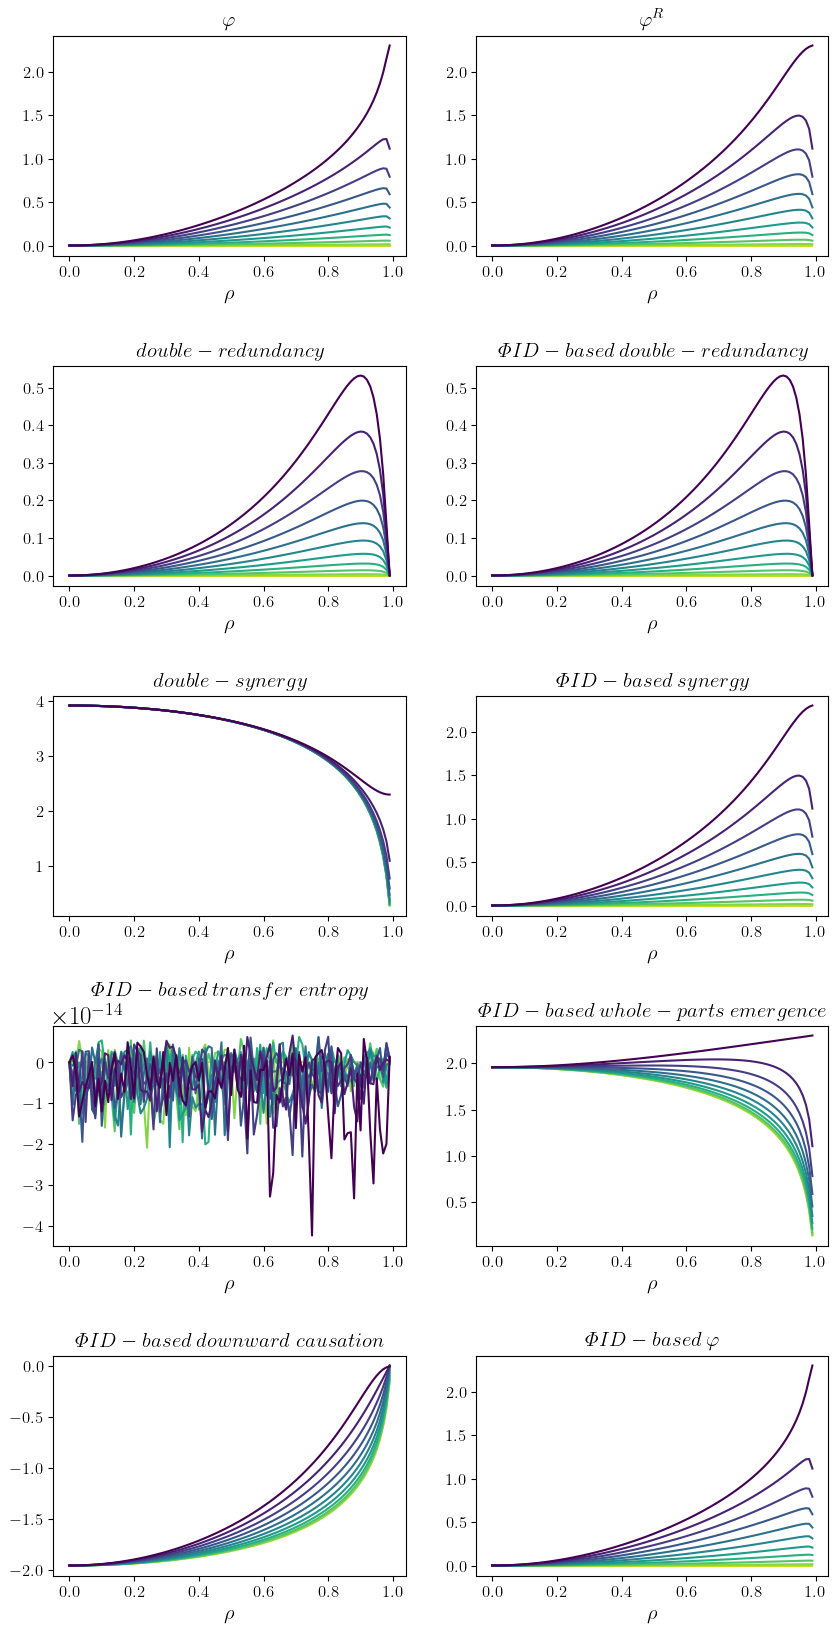

In [82]:
Nweights = 11
all_weights = np.linspace(0,1,Nweights)

plt.rc('text', usetex=True)
font = {'size': 18, 'family':'serif', 'serif': ['latin modern roman']}
plt.rc('font', **font)
plt.rc('legend', **{'fontsize': 14})
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

from matplotlib import cm

cmap = cm.get_cmap('viridis_r')
colors=[]
Nc=len(all_weights)
for i in range(Nc):
	colors+=[cmap(float(i+1)/(Nc+1-1))]

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()

j = 0
for quantity, ax in zip(quantities, axes):
    i = 0
    for weight, grp in df.groupby("weight"):
        if quantity == "phi":
            ax.plot(grp["correlation"], grp[quantity], "-",
                   color=colors[i],label=f"weight={weight:.2f}")
            #plt.legend(ncol=2,loc=0)
            i = i+1
        else:
            ax.plot(grp["correlation"], grp[quantity], "-",color=colors[i])
            #plt.legend(ncol=2,loc=0)
            i = i+1
    
    plt.subplots_adjust(hspace=0.5)
    ax.set_xlabel(r'$\rho$', fontsize=15)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.set_title(titles[j], fontsize=15)
    j = j+1
    #ax.set_title(f"{quantity}")
    #std_idx = (
    #    df.groupby("correlation")[quantity].std() > 0.01).cumsum()
    #first_real_val = std_idx[std_idx==1].index.values[0]
    #print(f"{quantity} - {first_real_val}")
    #ax.set_xlim(first_real_val, 1.0)
    print(j)
plt.show()
#fig.tight_layout()
#fig.legend()
fig.savefig('/media/nadinespy/NewVolume1/work/current_projects/viiit/viiit_with_miguel/IntegratedInformationInVariationalInference/results/plots/phiid_viiit.pdf')
fig.savefig('/media/nadinespy/NewVolume1/work/current_projects/viiit/viiit_with_miguel/IntegratedInformationInVariationalInference/results/plots/phiid_viiit.png')

